<a href="https://colab.research.google.com/github/Himanshu0548/Hotel-Booking-EDA-and-Predictions/blob/main/Hotel_Booking_EDA_and_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Details of the Dataset**

# Details of Dataset

1. hotel :(H1 = Resort Hotel or H2 = City Hotel).

2. is_canceled Value: showing if the booking had been cancelled (1) or not (0).

3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

4. arrival_date_year: Year of arrival date.

5. arrival_date_month: The months in which guests are coming.

6. arrival_date_week_number: Week number of year for arrival date.

7. arrival_date_day_of_month: Which day of the months guest is arriving.

8. stays_in_weekend_nights: Number of weekend stay at night (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

9. stays_in_week_nights: Number of weekdays stay at night (Monday to Friday) in the hotel.

10. adults: Number of adults.

11. children: Number of children.

12. babies: Number of babies.

13. meal: Type of meal booked.

14. country: Country of origin.

15. market_segment: Through which channel hotels were booked.

16. distribution_channel: Booking distribution channel.

17. is_repeated_guest: The values indicating if the booking name was from a repeated guest (1) or not (0).

18. previous_cancellations: Show if the repeated guest has cancelled the booking before.

19. previous_bookings_not_canceled: Show if the repeated guest has not cancelled the booking before.

20. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. assigned_room_type: Code for the type of room assigned to the booking. Code is presented instead of designation for anonymity reasons.

22. booking_changes: How many times did booking changes happen.

23. deposit_type: Indication on if the customer deposited something to confirm the booking.

24. agent: If the booking happens through agents or not.

25. company: If the booking happens through companies, the company ID that made the booking or responsible for paying the booking.

26. days_in_waiting_list: Number of days the booking was on the waiting list before the confirmation to the customer.

27. customer_type: Booking type like Transient – Transient-Party – Contract – Group.

28. adr: Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights.

29. required_car_parking_spaces: How many parking areas are necessary for the customers.

30. total_of_special_requests: Total unique requests from consumers.

31. reservation_status: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out

32. reservation_status_date: The last status date.

In [ ]:
#Read and load data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hotel_bookings (1).csv")

In [ ]:
#Display data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Cleaning

Real-world raw data is often incomplete, inconsistent, and lacking in certain behaviors or trends. The raw data contain many errors. So, once collected, the next step machine learning pipeline is to clean data which refers to removing unwanted data.

Some steps which are used to clean data are:



* Remove missing values, outliers, and unnecessary rows/ columns.
* Check and impute null values.
* Check Imbalanced data.
* Re-indexing and reformatting our data.

Let’s clean our Hotel booking cancellation dataset.

First, have to check if our data holds duplicate values.

Pandas duplicated() method helps to return duplicate values only, and any() method returns a boolean series that is True only if the conditions are true.



In [ ]:
#Check if data holds duplicate values.
df.duplicated().any()

True

In [ ]:
df.shape

(119390, 32)

Dataset holds the duplicate entries.

Pandas **drop_duplicate**() method helps to remove duplicate entries.
The keep parameter is set to False so that only Unique values are taken and the duplicate values are removed from the data.

In [ ]:
#Drop Duplicate entries 
df.drop_duplicates(inplace= False) # will keep first row and others consider as duplicate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Now check the number of missing values in each column and the percentage of missing values in columns.

Pandas **isna()** method helps to find out null values.

In [ ]:
null =100 *(df.isna().sum() /df.shape[0])
null

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
df.drop('company',axis=1, inplace = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


Let’s impute the missing values.

Before imputing missing values, it is necessary to understand the reason and relationship of missing data with columns. Missing data can be MAR, MCAR, and MNAR.





1.  MCAR (Missing completely at random): The values in the missing column are randomly missing and do not depend on the other column values.
2. MAR (Missing at random): The values in the missing column are dependent on some additional features.
3. MNAR (Missing not at random): The data is not missing randomly there might be some reason behind that.




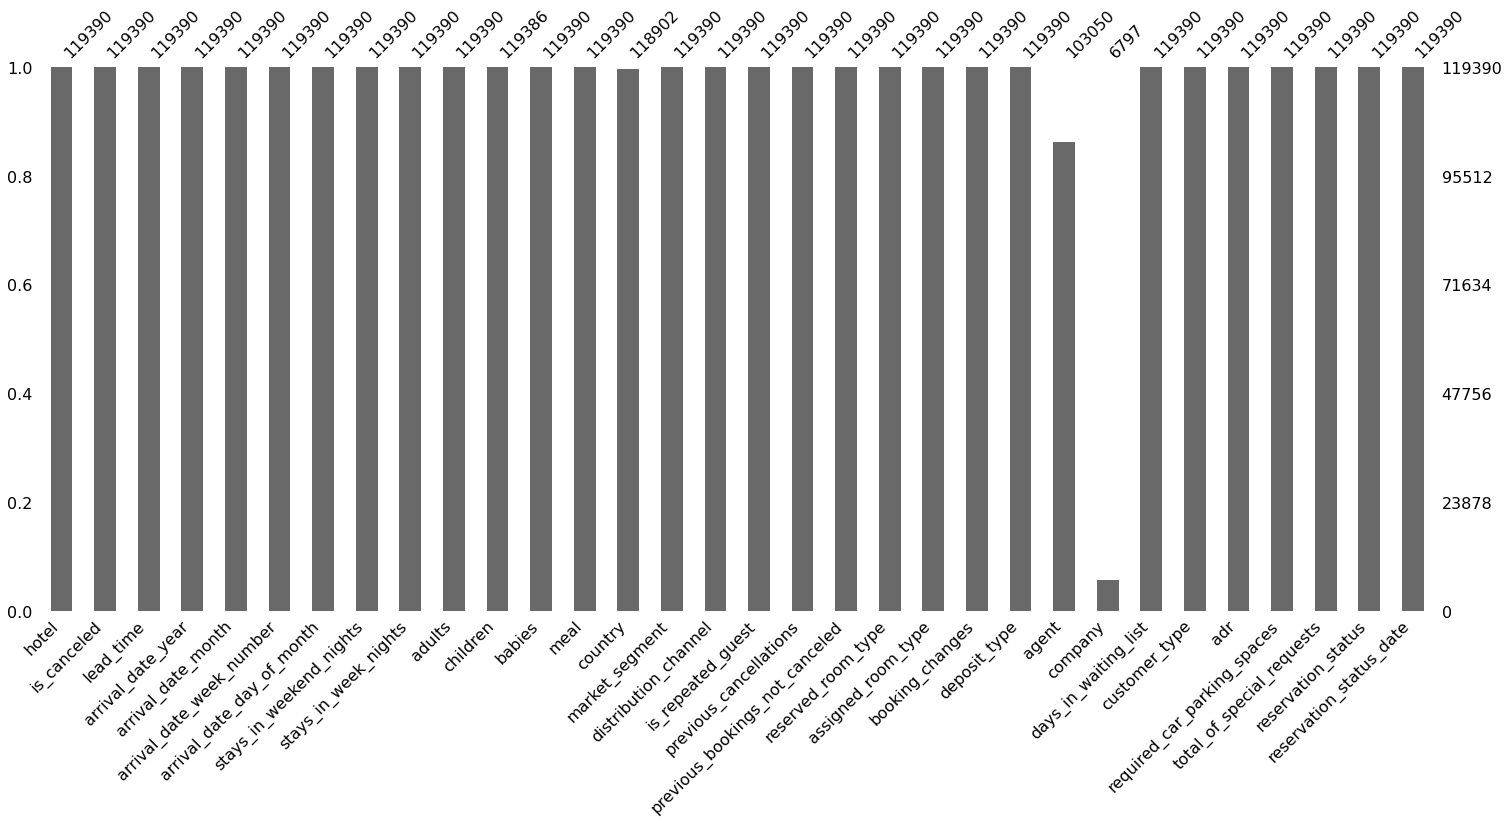

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

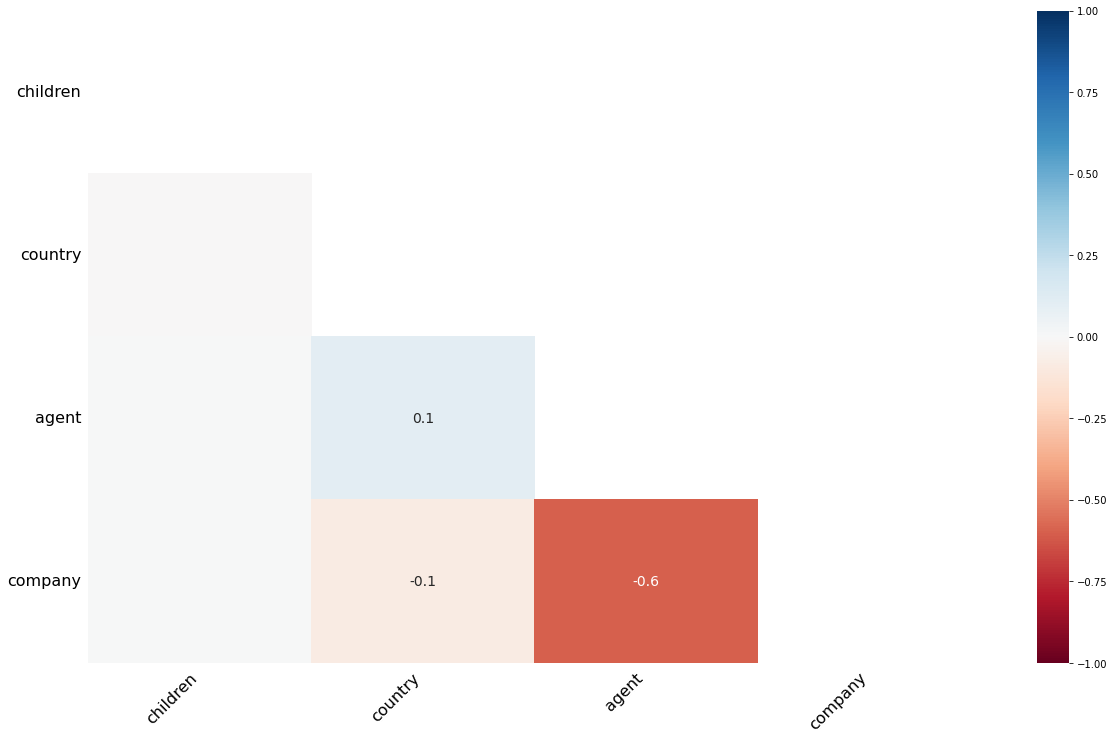

In [ ]:
msno.heatmap(df)

In [ ]:
df.fillna(0, inplace = True)

**Evaluation Matrix**

select the right evaluation matrix that is robust to the imbalanced dataset such as confusion matrix, f1 score, precision, Recall.
A simple and yet good metric that always helps when dealing with classification problems is the confusion matrix. A confusion matrix is a table that is used to represent the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. Thus, it is a terrific starting point for any classification model evaluation.
The following graphic model helps to summarize the metrics derived from the confusion matrix.

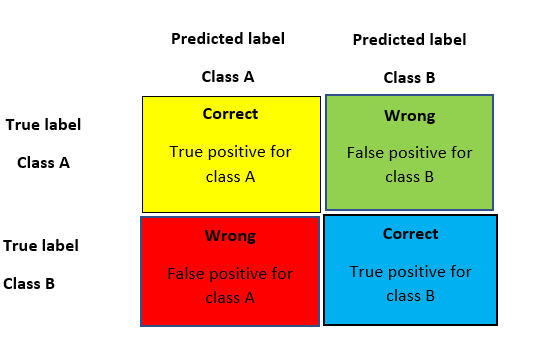


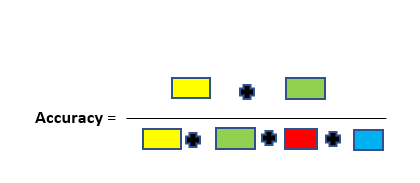


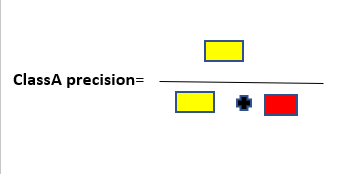

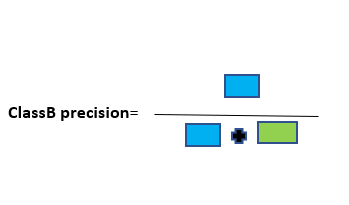

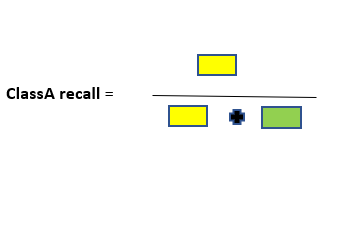

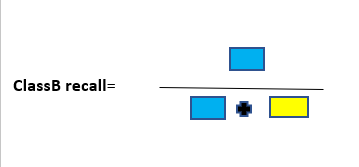


To the quick description of these metrics. The accuracy of the model is fundamentally the total number of correct predictions divided by a total number of predictions. The precision of a class defines how trust-able is the outcome is when the model answers that a point belongs to that class. The recall of a class represents how nicely the model is able to detect that class. The F1 score of a class is given by the harmonic mean of precision and recall (2×precision×recall / (precision + recall)), it combines precision and recall of a class in one metric.

For a given class, the different combinations of recall and precision have the following meanings :

*    high recall + high precision: the class is completely handled by the model
*    low recall + high precision: the model can’t detect the class well but is positively trust-able when it does
*    high recall + low precision: the class is well detected but the model also contains points of other classes in it
*    low recall + low precision: the class is wrongly handled by the model.


**Random resampling Technique**

One approach to addressing the imbalanced dataset problem is to randomly resample the training dataset. Two main approaches that come under the random resample are undersampling and oversampling.
Under-sampling reduces the number of majority samples to balance the class distribution. Since it is removing observations from the original data set there is a high chance of discarding data. Over-sampling boosts the number of minority class members in the training set. The benefit of over-sampling is that no information from the original training set is lost, as all observations from the minority and majority classes are kept which leads to overfitting.


**SMOTE**

It helps to overcome the disadvantage of oversampling. The advantage of SMOTE is that you are not generating duplicates but rather creating synthetic data points that are slightly different from the original data.

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

Our dataset has an imbalanced dataset.

### Handling Outliers

There are two types of outliers:

1.    Univariate outliers: Outliers are the data points that are away from the expected range of values. In Univariate analysis single variable is considered to detect outliers.
2.    Multivariate outliers: These outliers are dependent on the correlation between two variables.


### Univariate Anlaysis

In the univariate analysis, we consider only a single variable that can be numerical or categorical. For numerical continue variables, we can use a histogram or scatter plot, and for categorical data, we commonly preferred bar plots or pie charts.

### Bivariate Analysis

We can handle bivariate analysis in 3 ways:

Numeric and Numeric:

In Numeric-Numeric analysis, we compare both numeric variables. The scatter plots, pair plots, and correlation matrics compare two numeric columns.

**Scatter Plot**

A scatter plot represents every data point in the graph format. It shows the relationship of two data means how the values from one column fluctuate according to the corresponding values in another column.

**Pair Plot**

Pair plots compare multiple variables at the same time. Pair plots save spaces and compare various variables at the same time.

**Correlation Matrix**

A correlation matrix glimpses the correlation between different variables. The correlation between two variables is determined by the correlation coefficient.

**Numeric – Categorical Analysis**

In numeric-categorical analysis, one variable is a numeric type and the other is a categorical variable. We can use group by function or box plot to perform numeric-categorical analysis.

**Categorical-categorical Analysis**

The chi-square test determines the association between categorical variables. The Chi-square test calculates based on the difference between expected frequencies and the observed frequencies in one or more categories of the frequency table.

The Zero probability indicates a complete dependency between two categorical variables. The One probability indicates two categorical variables are completely independent.

## Data Preprocessing and Analysis

babies, adults, and children can not be zero at the same time, so we will drop all the observations having zero at the same time.

In [ ]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)

In [ ]:
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


From where the most guest are coming?

In [ ]:
guest_city = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

,Country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


Let’s visualized using graphics visualization

In [ ]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

Most guests are from Portugal and other countries in Europe.

What are the Room prices overnights for each month?

In [ ]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
data_resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel


,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592




Now we observe here that the month column is not in order, and if we visualize we will get improper conclusions.

So, first, we have to provide the right hierarchy to the month column.


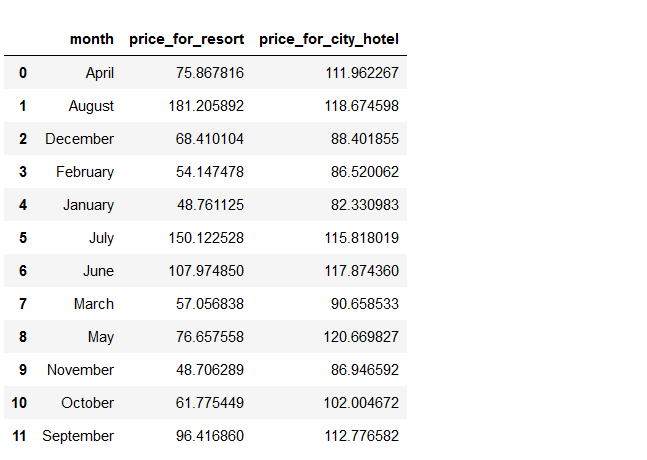

 sorted-months-weekdays  N  ow we observe here that the month column is not in order, and if we visualize we will get improper conclusions.

So, first, we have to provide the right hierarchy to the month column.

In [ ]:
!pip install sort-dataframeby-monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=3beae3f8c882bf87ad1cb77aeb87804f5d0aad24d7fe627b836d0d4fc53ce76c
  Stored in directory: /root/.cache/pip/wheels/f8/84/15/465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort-dataframeby-monthorweek


In [ ]:
!pip install sorted-months-weekdays 
import sort_dataframeby_monthorweek as sd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=53473f1c33a37140839c0e55eaf44e8e8bd4a9d444af7ac4bb7952d337388af5
  Stored in directory: /root/.cache/pip/wheels/9a/0d/2e/309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


In [ ]:
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

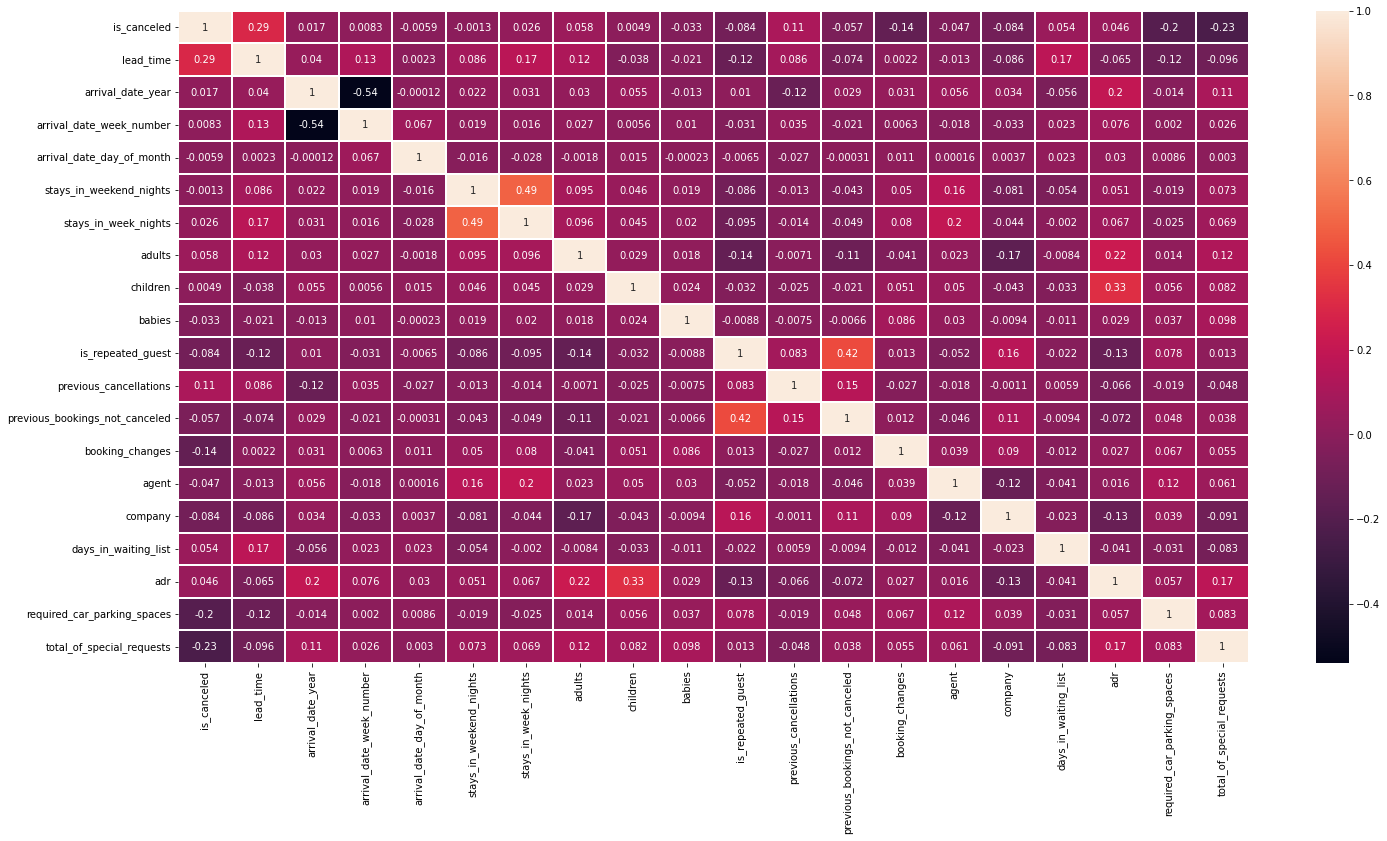

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


In [ ]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [ ]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [ ]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [ ]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [ ]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

Normalized numerical columns that have high variance

In [ ]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)

num_df['adr'] = np.log(num_df['adr'] + 1)

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [ ]:
np.where(np.isnan(X))

(array([14962]), array([23]))

In [ ]:
X=np.nan_to_num(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)



**Logistic Regression**

Logistic regression comes under the most popular Supervised Machine Learning algorithms. Logistic regression predicts the categorical dependent variable using a given set of independent variables. The categorical dependent variable should be either Yes or No, 0 or 1, true or false, etc. Logistic regression is much comparable to Linear Regression only implementation is different. Linear Regression solves the Regression problems, and Logistic regression is used for solving the classification problems. Instead of fitting the regression line, In logistic regression, we fit the sigmoid S function, which predicts two maximum values(0,1). The curve from the logistic function indicates the likelihood of something such as whether rain comes or not based on weather conditions.
Logistic Function (Sigmoid Function)

To map the predicted values to probabilities sigmoid function is used. It maps the values between the range of 0 and 1. The threshold value is used in the logistic regression to compute the S Shape. The threshold value defines the probability of either 0 or 1. The value above the threshold tends to be 1, and the values below the threshold tend to 0.
Assumptions for Logistic Regression

    The data must follow a normal distribution.
    The dependent variable must be categorical.
    The independent variable should not have multi-collinearity

**Type of Logistic Regression**

The Logistic regression is classified into three types based on the categories.

* Binomial: If dependent variables hold two categories such as 0 or 1, male or female, pass or fail, it comes into binomial logistic regression.
* Multinomial: If a dependent variable holds three or more possible unordered categorical variables, such as cat, dog, lion, it comes into multinomial logistic regression.
* Ordinal: If the dependent variable holds three or more possible ordered categorical variables such as low, medium, high, it comes into ordinal logistic regression.


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8088527248832592
Confusion Matrix : n[[21593   990]
 [ 5846  7334]]
Classification Report : n              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22583
           1       0.88      0.56      0.68     13180

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.77     35763
weighted avg       0.82      0.81      0.80     35763



### Applying KNN Algorithm on Hotel Booking Cancellation Dataset

K-Nearest Neighbor is another effortless supervised Machine Learning algorithm. KNN algorithm assumes the similarities between new data and available data. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. KNN is used to solve both classification and regression problems. K-NN is a non-parametric algorithm, which means it does not make any assumptions on underlying data. KNN is a lazy learner algorithm because the KNN algorithm stores the dataset during the training phase. When KNN gets new data, then it classifies that data into a category that is much similar to the new data. Example: Suppose, we have an image of an animal that looks like a cat and a dog, but we want to understand whether it is a cat or a dog. Using the KNN algorithm we can perform this identification, as it works on similarity dimensions. Our KNN model will find the similar features of the new data set to the cats and dogs images, and based on the most similar features it will put it in either the cat or dog category. To find the nearest value we use the Euclidean distance.

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of KNN is : 0.8922909151916786
Confusion Matrix : n[[21793   790]
 [ 3062 10118]]
Classification Report : n              precision    recall  f1-score   support

           0       0.88      0.97      0.92     22583
           1       0.93      0.77      0.84     13180

    accuracy                           0.89     35763
   macro avg       0.90      0.87      0.88     35763
weighted avg       0.90      0.89      0.89     35763



### Decision Tree Classification Algorithm

The Decision Tree algorithm belongs to the family of non-parametric, supervised learning algorithms. It allows for solving regression and classification problems too.

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of Decision Tree is : 0.9474037412968711
Confusion Matrix : n[[21592   991]
 [  890 12290]]
Classification Report : n              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22583
           1       0.93      0.93      0.93     13180

    accuracy                           0.95     35763
   macro avg       0.94      0.94      0.94     35763
weighted avg       0.95      0.95      0.95     35763



## Random Forest Algorithm

Random Forest is a popular supervised machine learning algorithm. The random forest algorithm implements both Classification and Regression problems in ML. The Random Forest is a classifier that includes several decision trees instead of relying on one decision tree, the random forest takes the prediction from each tree, and based on the majority votes of predictions, it predicts the final output. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of Random Forest is : 0.9538349691021447
Confusion Matrix : n[[22392   191]
 [ 1460 11720]]
Classification Report : n              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22583
           1       0.98      0.89      0.93     13180

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.95      0.95     35763



## Summary


The given dataset is a supervised classification dataset. It holds booking information for a city hotel and a resort hotel with information such as How and when the booking was made, the length of passengers’ stay with the number of parking slots available, the number of adults, children, and babies. The Logistic regression, K-Nearest Neighbor, Decision Tree, Random Forest algorithms are used to handle this supervised classification model. Among these four machine learning algorithms, Random forest and Decision trees perform well with respect to accuracy.